# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [4]:


import numpy as np


**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [5]:
def max_element(arr):
    elem = np.zeros(len(arr))
    elem[1:] = (arr == 0)[:-1]
    arr = arr[np.where(elem == True)]
    return arr.max()
max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [7]:
def nearest_value(X, v):
    return np.min(np.abs(X - v)) + v

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))

4.0


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [10]:

def scale(X):
    d = X.std(axis=0)
    d[d == 0] = 1
    X = X - X.mean(axis=0) 
    X /= d
    return(X)

X = np.random.randint(0, 10, (4, 4))
print(X)
print(scale(X))

[[8 4 6 6]
 [7 8 4 6]
 [7 6 1 2]
 [3 0 9 3]]
[[ 0.91132238 -0.16903085  0.34299717  0.98019606]
 [ 0.39056673  1.18321596 -0.34299717  0.98019606]
 [ 0.39056673  0.50709255 -1.37198868 -1.26025208]
 [-1.69245584 -1.52127766  1.37198868 -0.70014004]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [14]:
M = np.random.normal(10, 1, (3, 3))
M

array([[ 9.8044954 ,  8.7040186 , 11.92022765],
       [ 9.92132133, 10.11834317, 11.85544324],
       [ 9.50076755, 10.30284894, 12.03780301]])

In [15]:
def get_stats(X):
    print(np.linalg.det(X))
    print(np.trace(X))
    print(X.max())
    print(X.min())
    print(np.linalg.norm(X))
    print(np.linalg.eig(X)[0])
    print('\n', np.linalg.inv(X))

In [16]:
get_stats(M)

10.044726980390072
31.960641577583765
12.037803012245378
8.704018596751117
31.570031649006864
[31.42083241+0.j          0.26990458+0.49682511j  0.26990458-0.49682511j]

 [[-0.03406951  1.79547374 -1.73453749]
 [-0.67648443  0.47520179  0.20187409]
 [ 0.60587496 -1.82378054  1.27926659]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [17]:
max_vals = np.array([])
for exp_num in range(100):
    X = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    Y = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    max_vals = np.append(max_vals, [np.dot(X, Y).max()])
print(max_vals.mean())
print(np.percentile(max_vals, 95))

8.579573015596527
12.809807240099962


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [21]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/ee/e87d7a79a32f5ac833655ef29ebd37c7b389e8957bc71aacb10a95f822b9/matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8b/4f/be28a39cd5e988b8d3c2cc642c2c7ffeeb28fe80a86df71b6d1e473c5038/contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/89/17/a8c8e905a618302f4bd702a9a91910a36edd5b0ece7dd63e2e6c23641d76/fonttools-4.43.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency i

In [22]:
import pandas as pd
%matplotlib inline

In [23]:
data = pd.read_csv('2008.csv')
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [26]:
cancel = data['CancellationCode'].mode()
cancel

0    A
Name: CancellationCode, dtype: object

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [29]:
distance = data['Distance']
print(distance.mean())
print(distance.min())
print(distance.max())

724.5082571428571
31
4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [30]:
data.loc[data['Distance'] == 31, ['FlightNum', 'Distance', 'Year', 'Month', 'DayofMonth']]

,FlightNum,Distance,Year,Month,DayofMonth
1116,65,31,2008,12,30
6958,65,31,2008,12,26
17349,64,31,2008,8,18
27534,64,31,2008,3,11
46082,65,31,2008,8,9
48112,64,31,2008,2,28


In [31]:
data.loc[(data['FlightNum'] == 64) | (data['FlightNum'] == 65)][['Distance', 'FlightNum']]


,Distance,FlightNum
501,533,64
1116,31,65
1389,680,64
1517,680,65
2619,2381,64
...,...,...
66529,82,65
67172,533,64
68264,386,65
68338,2454,65


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [32]:
data['Origin'].value_counts().idxmax()

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [34]:
data[['Origin', 'AirTime']].groupby(by='Origin').mean()

,AirTime
Origin,
ABE,88.266667
ABI,36.400000
ABQ,93.454321
ABY,35.714286
ACK,50.800000
...,...
WRG,18.000000
XNA,85.945736
YAK,35.900000


In [35]:
data.groupby('Origin')['AirTime'].mean().idxmax()

'SJU'

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [36]:
all_ap = data.groupby('Origin').filter(lambda x: len(x) >= 1000).groupby('Origin').size()
all_ap_delay = data.groupby('Origin').filter(lambda x: len(x) >= 1000)[data['DepDelay'] > 0].groupby('Origin').size()

p = all_ap_delay / all_ap
p.idxmax()

/var/folders/46/sq60ntjj7c5bqzjg23rs0_mm0000gn/T/ipykernel_927/2539705597.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_ap_delay = data.groupby('Origin').filter(lambda x: len(x) >= 1000)[data['DepDelay'] > 0].groupby('Origin').size()


'EWR'

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [37]:
data = pd.read_csv('2008.csv')

In [38]:
data.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime           False
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode      True
Diverted             False
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [39]:
data.isnull().sum().sum()

355215

In [40]:
data.isnull().any(axis = 1).sum()

70000

In [41]:
data.isnull().any().sum()

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [49]:
data1 = data[(data['DepDelay'].isnull() == False) & (data['DepDelay'] != 0)]
data1 = data1.drop(['Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
                    'SecurityDelay', 'LateAircraftDelay'], axis='columns')

data1 = data1.reset_index(drop=True)
depdelay_new = data1['DepDelay'].values
data1 = data1.drop('DepDelay', axis='columns')
data1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0,0
63400,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0
63401,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0
63402,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [50]:
def get_hour(time):
    if np.isnan(time):
        return np.nan
    else:
        h = str(int(time))[:-2]
        if h == '':
            return np.nan 
        else:
            return int(h)
        
def get_min(time):
    if np.isnan(time):
        return np.nan
    else:
        m = str(int(time))
        return int(m[len(m)-2:])

def split_time_features(data, column):
    hours = data[column].apply(get_hour)
    mins = data[column].apply(get_min)
    data[column + '_Hour'] = hours
    data[column + '_Minute'] = mins
    data = data.drop(column, axis=1)
    return data

data1 = split_time_features(data1, 'DepTime')
data1 = split_time_features(data1, 'CRSDepTime')
data1 = split_time_features(data1, 'ArrTime')
data1 = split_time_features(data1, 'CRSArrTime')
data1

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,8.0,0,21.0,11,20.0,55,23.0,8.0,23.0,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,12.0,0,14.0,26,14.0,10,17.0,30.0,17.0,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,9.0,0,11.0,43,11.0,45,15.0,1.0,15.0,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,19.0,0,11.0,41,11.0,44,13.0,23.0,13.0,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,8.0,0,8.0,15,8.0,20,12.0,43.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,13.0,0,9.0,20,9.0,25,11.0,10.0,11.0,18
63400,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,20.0,0,18.0,29,18.0,40,21.0,37.0,21.0,49
63401,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,13.0,0,11.0,49,11.0,25,13.0,36.0,13.0,14
63402,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,22.0,0,19.0,6,19.0,0,22.0,0.0,21.0,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [51]:
data1 = data1.drop(['TailNum', 'Year'], axis=1)

In [52]:
data1_num = data1.select_dtypes([np.number])
data1_mean = data1_num.mean()
num_func = data1_num.columns

In [54]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [55]:
import seaborn as sns
%matplotlib inline

/var/folders/46/sq60ntjj7c5bqzjg23rs0_mm0000gn/T/ipykernel_927/1121963185.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(func_order, fontsize = 15)


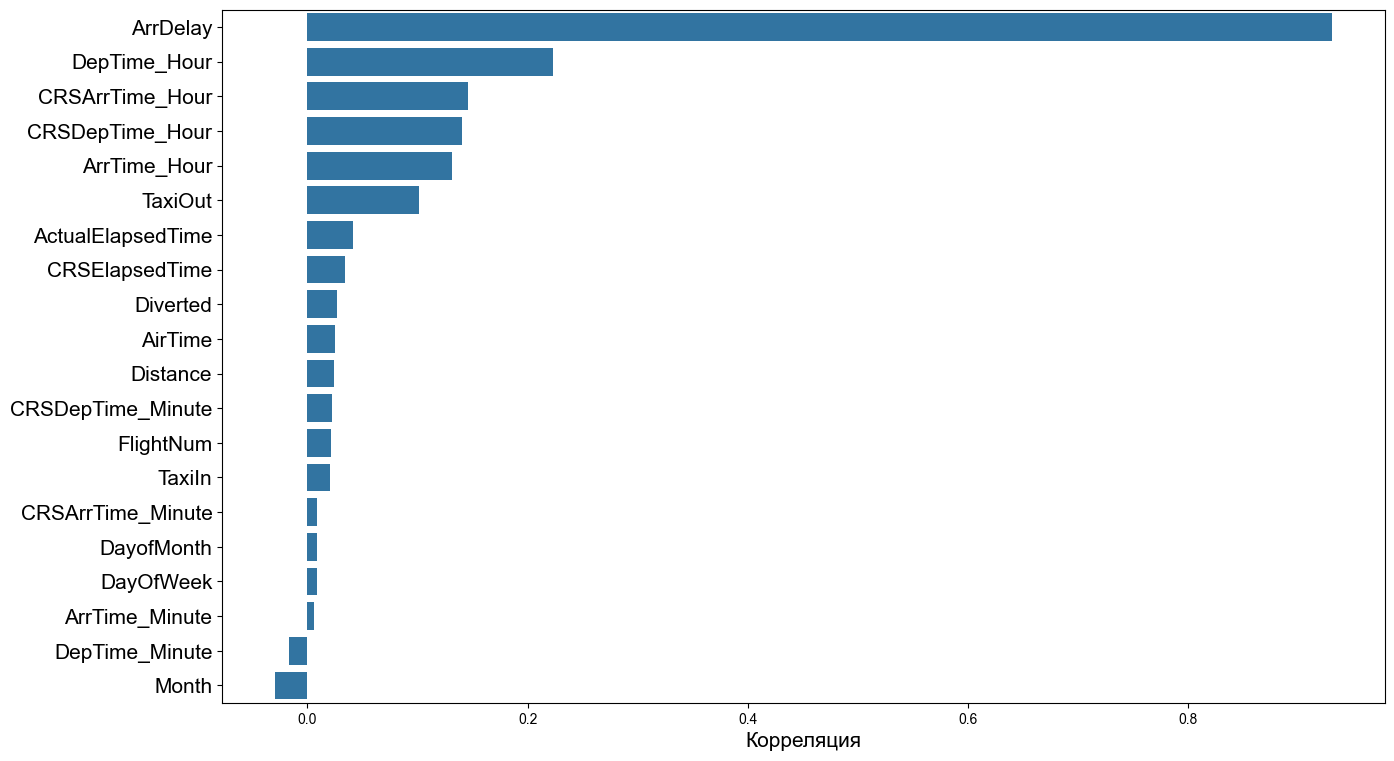

In [56]:
X = data1_num.fillna(data1_mean)

correlations = {
    feature: np.corrcoef(X[feature], depdelay_new)[0][1]
    for feature in num_func
}
correlation = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
func_order = [x[0] for x in correlation]
correlations = [x[1] for x in correlation]

plot = sns.barplot(y = func_order, x = correlations)
sns.set_style('ticks')
plot.set_xlabel('Корреляция', fontsize = 15)
plot.set_yticklabels(func_order, fontsize = 15)
plot.figure.set_size_inches(15, 9)

numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

In [57]:

X.drop('ArrDelay', axis = 1, inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

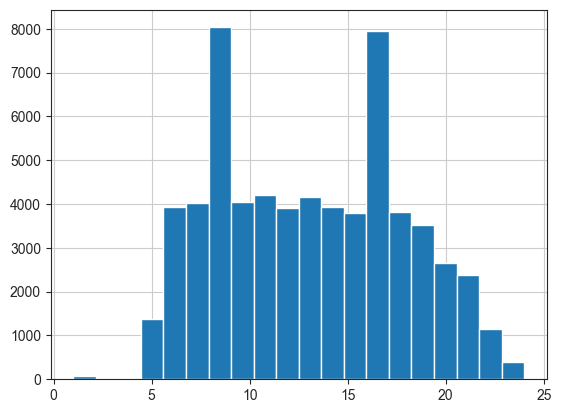

In [58]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

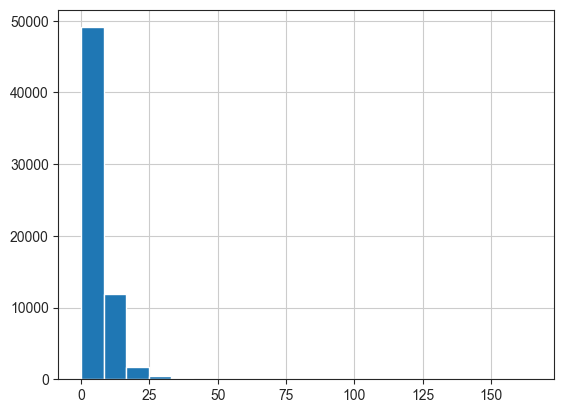

In [59]:
X['TaxiIn'].hist(bins=20)

<Axes: >

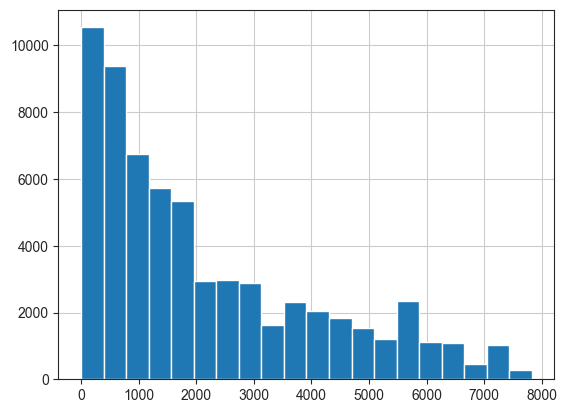

In [60]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [66]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f2/b4/c273b046e0f14e76ec33fdce82d70ddce1c796aaabadf436b3b8bf01ffb5/scikit_learn-1.3.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/b1/a6/b6d66d4f4045ba59200d25f254ccd63340162c903f95231e3ae6863fc4ae/scipy-1.11.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 730.4 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
def transform_data(data):
    num_data = data.select_dtypes(np.number).columns
    categor_data = data.select_dtypes(object).columns
    data[num_data] = data[num_data].fillna(0)
    data[categor_data] = data[categor_data].fillna('nan')
    
    scaler = StandardScaler()
    data[num_data] = scaler.fit_transform(data[num_data])
    
    categor_encoded = pd.get_dummies(data[categor_data])
    data = pd.concat([data, categor_encoded], axis=1)
    
    data.drop(categor_data, axis=1, inplace=True)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [69]:
dt = transform_data(data1)
dt


,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,-0.744130,-0.786908,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.183961,-0.582387,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,0.471018,-0.582387,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.347886,-0.582387,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,0.634799,-0.582387,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.431159,-0.120706,1.053782,...,False,False,False,False,False,False,False,False,False,False
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.533455,-0.217566,3.098994,...,False,False,False,False,False,False,False,False,False,False
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.336062,-1.043514,-0.582387,...,False,False,False,False,False,False,False,False,False,False
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,0.310488,1.208912,2.689951,...,False,False,False,False,False,False,False,False,False,False


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dt, depdelay_new, test_size=0.3, random_state = 40)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [73]:
x_train_1 = X_train[:1000]
y_train_1 = y_train[:1000]

rgr = LinearRegression().fit(x_train_1, y_train_1)

y_train_pred = rgr.predict(x_train_1)
y_pred = rgr.predict(X_test)

y_train_mse = mean_squared_error(y_train_1, y_train_pred)
y_mse = mean_squared_error(y_test, y_pred)

y_train_r2 = r2_score(y_train_1, y_train_pred)
y_r2 = r2_score(y_test, y_pred)

print('MSE подвыборка:', y_train_mse)
print('MSE контрольная выборка:', y_mse)
print('R^2 подвыборка:', y_train_r2)
print('R^2 контрольная выборка:', y_r2)

MSE подвыборка: 2.4610865955006116e-26
MSE контрольная выборка: 31.02742313250044
R^2 подвыборка: 1.0
R^2 контрольная выборка: 0.9734887078309666


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [74]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [75]:
Las = Lasso().fit(x_train_1, y_train_1)
Rdg = Ridge().fit(x_train_1, y_train_1)

Lz = np.sum(Las.coef_ == 0)
Rz = np.sum(Rdg.coef_ == 0)
print('Lasso:', Lz)
print('Ridge:', Rz)

Lasso: 629
Ridge: 288


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+02, tolerance: 1.130e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e+02, tolerance: 1.130e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.391e+02, tolerance: 1.130e

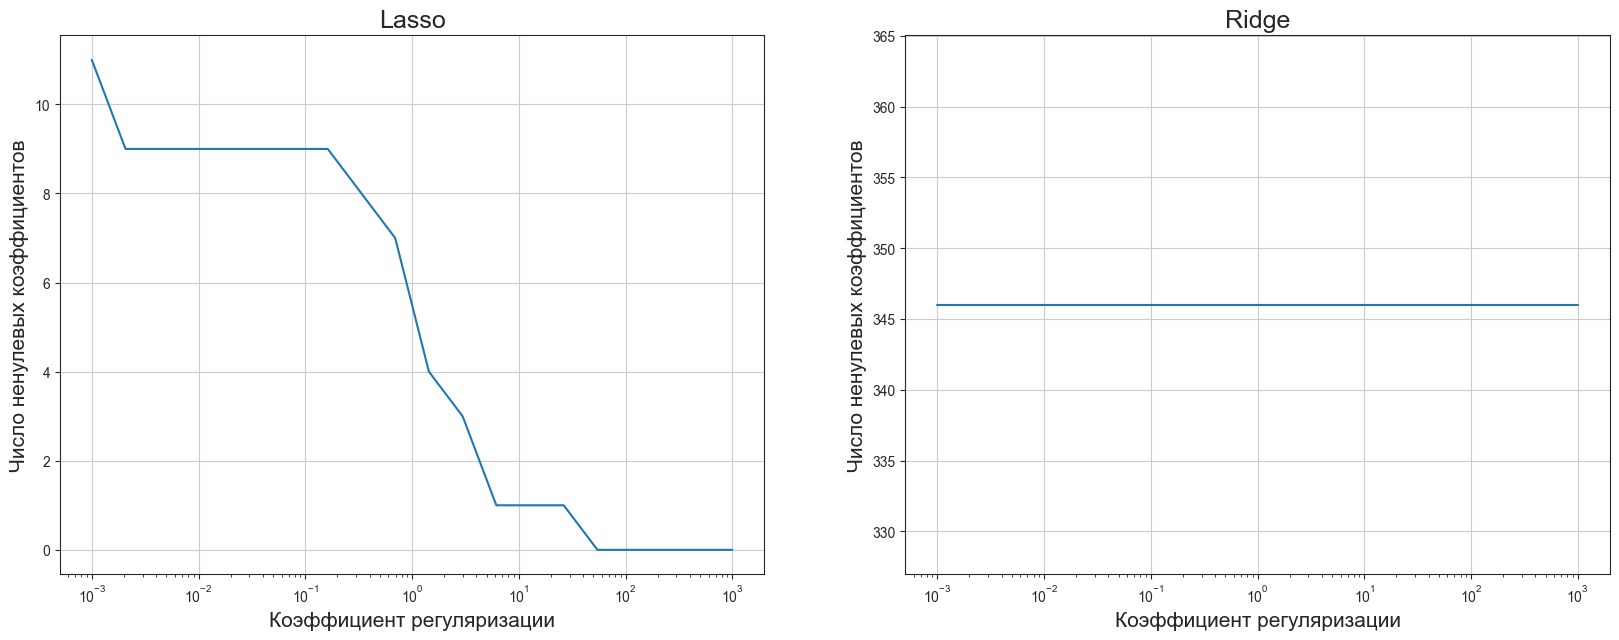

In [77]:
a = np.logspace(-3, 3, 20)
L_1 = list()
L_2 = list()

for i in range(len(a)):
    Lasso_a = Lasso(a[i]).fit(x_train_1, y_train_1)
    Ridge_a = Ridge(a[i]).fit(x_train_1, y_train_1)
    L_1.append(np.sum(Lasso_a.coef_ != 0))
    L_2.append(np.sum(Ridge_a.coef_ != 0))
    
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(a, L_1, label='Lasso')
ax[0].set_xscale('log')
ax[0].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[0].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[0].set_title('Lasso', fontsize=18)
ax[0].grid()

ax[1].plot(a, L_2, label='Ridge')
ax[1].set_xscale('log')
ax[1].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[1].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[1].set_title('Ridge', fontsize=18)
ax[1].grid()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [78]:
from sklearn.metrics import make_scorer

In [79]:
def RMSE(y, y_pred):
    error = (y - y_pred) ** 2
    return np.sqrt(np.mean(error))

RMSE_scorer = make_scorer(RMSE, greater_is_better=False)
y_pred = Rdg.predict(X_test)
print("RMSE =", RMSE(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R^2 =", r2_score(y_test, y_pred))

RMSE = 5.340124692541743
MAE = 0.9910681290713936
R^2 = 0.9756337899644425


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [80]:
from sklearn.model_selection import GridSearchCV


RMSE alpha = 0.0010


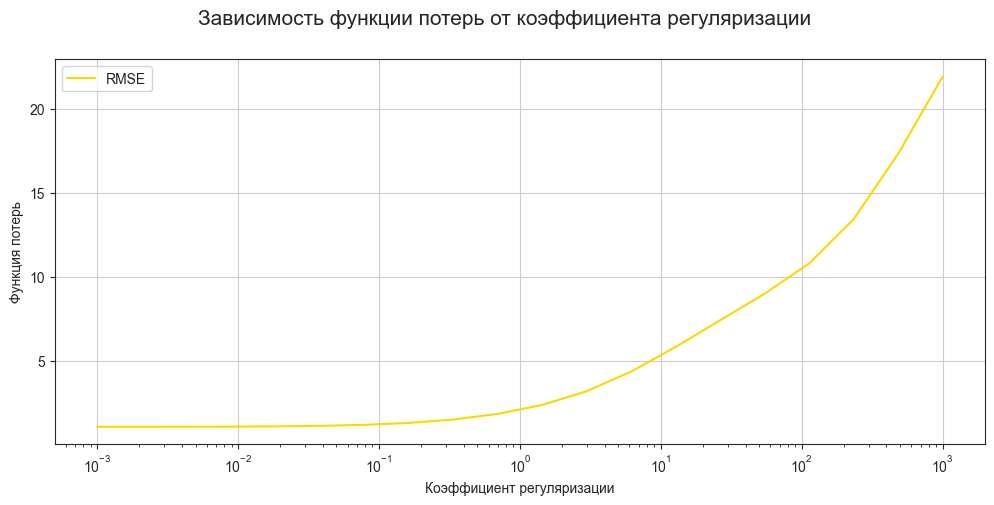

In [81]:
searcher_rmse = GridSearchCV(Ridge(), [{"alpha": a}], scoring=RMSE_scorer, cv=5).fit(x_train_1, y_train_1)
best_alpha_rmse = searcher_rmse.best_params_["alpha"]
print("RMSE alpha = %.4f" % best_alpha_rmse)

fig = plt.figure(figsize=(12, 5))
plt.plot(a, -searcher_rmse.cv_results_["mean_test_score"], label='RMSE', color = 'gold')
fig.suptitle("Зависимость функции потерь от коэффициента регуляризации", fontsize=15)
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Функция потерь")
plt.grid()
plt.legend()
plt.show()

MAE alpha = 0.0010


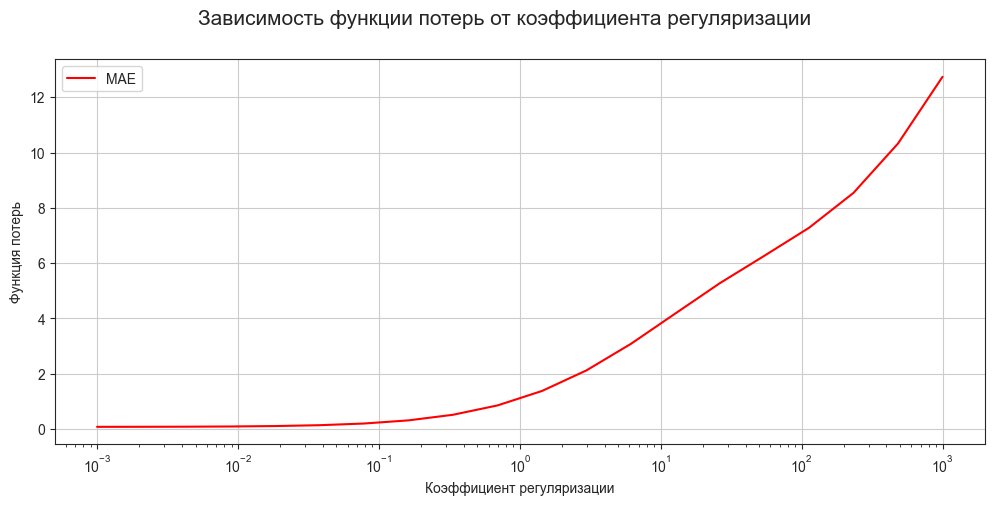

In [82]:
searcher_mae = GridSearchCV(Ridge(), [{"alpha": a}], scoring='neg_mean_absolute_error', cv=5).fit(x_train_1, y_train_1)
best_alpha_mae = searcher_mae.best_params_["alpha"]
print("MAE alpha = %.4f" % best_alpha_mae)

fig = plt.figure(figsize=(12, 5))
plt.plot(a, -searcher_mae.cv_results_["mean_test_score"], label='MAE', color = 'red')
fig.suptitle("Зависимость функции потерь от коэффициента регуляризации", fontsize=15)
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Функция потерь")
plt.grid()
plt.legend()
plt.show()

R^2 alpha= 0.3360


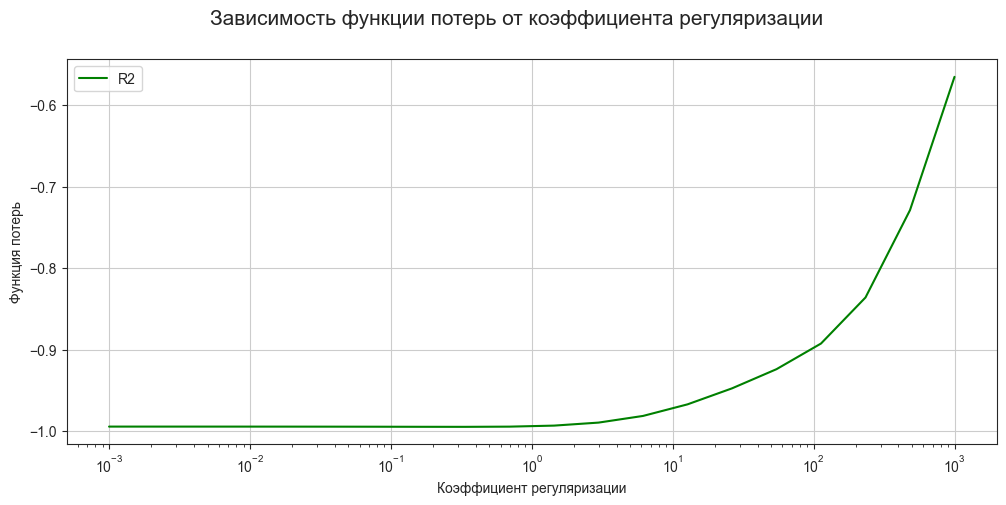

In [83]:
searcher_r2 = GridSearchCV(Ridge(), [{"alpha": a}], scoring='r2', cv=5).fit(x_train_1, y_train_1)
best_alpha_r2 = searcher_r2.best_params_["alpha"]
print("R^2 alpha= %.4f" % best_alpha_r2)

fig = plt.figure(figsize=(12, 5))
plt.plot(a, -searcher_r2.cv_results_["mean_test_score"],label='R2', color = 'green')
fig.suptitle("Зависимость функции потерь от коэффициента регуляризации", fontsize=15)
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Функция потерь")
plt.grid()
plt.legend()
plt.show()

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_predict

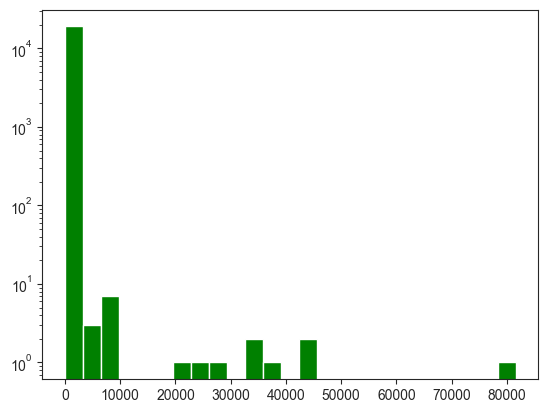

In [87]:
Rdg = Ridge()
y_pred = cross_val_predict(Rdg, X_test, y_test)
error = (y_pred - y_test) ** 2
plt.hist(error, bins = 25, color = 'green')
plt.yscale("log")